In [1]:
def get_unique_values(keys, target_key, datatype = float):
    unique_c_values = set()  

    for key in keys:
        if not (target_key + "=") in key:
            continue
        key_value_pairs = key.split(", ")
        for pair in key_value_pairs:
            k, v = pair.split("=") 
            if k == target_key:
                unique_c_values.add(datatype(v))

    unique_c_values_list = sorted(list(unique_c_values))

    return unique_c_values_list

def get_param_value(filename, target_key, value_type = float):
    unique_c_values = set()

    l = filename.split("_")
    
    tmp = l[l.index(target_key) + 1]
    if ".json" in tmp:
        val = value_type(tmp[:-5])
    else:
        val = value_type(tmp)

    return val

In [6]:
import json, glob
gate_type = "haar"
error_type = "depol"

n_data = 10000
eps = 1e-4
load_each_J = True

cmax=None

sname = f"../results/success_rate/success_rate_{gate_type}_{error_type}_ndata_*_eps_{eps:.2e}*.json"
fname_list = glob.glob(sname)
ndata_candidates = sorted(list(set([get_param_value(_f, "ndata", int) for _f in fname_list])))
print("\ncandidates for ndata:")
print(ndata_candidates)
print(f"your choice: {n_data}")

if load_each_J:
    if cmax is not None:
        sname = f"../results/success_rate/success_rate_{gate_type}_{error_type}_ndata_{n_data}_cfilled_eps_{eps:.2e}_J_*_cmax_{cmax}.json"
        fname_list = glob.glob(sname)
    else:
        sname = f"../results/success_rate/success_rate_{gate_type}_{error_type}_ndata_{n_data}_cfilled_eps_{eps:.2e}_J_*.json"
        fname_list = sorted([f for f in glob.glob(sname) if "cmax" not in f])
    
    print()
    for f in fname_list:
        print(f)
    
    J_list = [get_param_value(_f, "J", int) for _f in fname_list]
    print("\ncandidates for ndata:")
    data = {}
    for J, filename in zip(J_list, fname_list):
        key = f"{J=}"
        data[key] = json.load(open(filename, "r"))
    
        nondiag_l1_data = data[key]["nondiag_l1_data"]
        c_list = get_unique_values(nondiag_l1_data.keys(), "c")
        
        print(c_list)
    
else:
    filename = f"../results/success_rate/success_rate_{gate_type}_{error_type}_ndata_{n_data}_cfilled_eps_{eps:.2e}.json"

    data = json.load(open(filename, "r"))

    nondiag_l1_data = data["nondiag_l1_data"]
    dnorm_data = data["dnorm_data"]
    c_list = get_unique_values(nondiag_l1_data.keys(), "c")
    eps_list = get_unique_values(nondiag_l1_data.keys(), "eps")

print(f"\n{c_list=}")
print(f"{J_list=}")



candidates for ndata:
[50, 10000]
your choice: 10000

../results/success_rate/success_rate_haar_depol_ndata_10000_cfilled_eps_1.00e-04_J_1.json
../results/success_rate/success_rate_haar_depol_ndata_10000_cfilled_eps_1.00e-04_J_2.json
../results/success_rate/success_rate_haar_depol_ndata_10000_cfilled_eps_1.00e-04_J_3.json

candidates for ndata:
[1.1, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0]
[1.1, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0]
[1.1, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0]

c_list=[1.1, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0]
J_list=[1, 2, 3]


/var/folders/xw/hgtg8nx922g7smt8_4th3hxc0000gn/T/ipykernel_76375/2518770281.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("Blues")


(5e-05, 1.2)

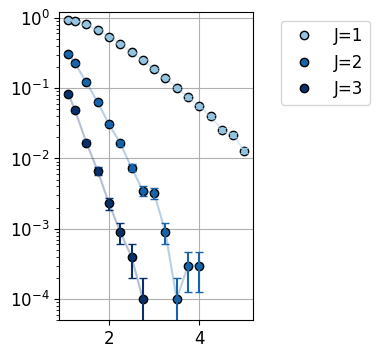

In [7]:
import numpy as np
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["font.size"] = 12
cmap = get_cmap("Blues")
fig = plt.figure(figsize = (2.5, 4))

eps = 1e-4
threshold = 1e-12
J_list_disp = [1, 2, 3, ]
for ii, J in enumerate(J_list_disp):
    color = cmap((ii+1)/(len(J_list_disp)-0.5))
    try:
        if load_each_J:
            kkey = f"{J=}"
            success = []
            success_std = []
            for c in c_list:
                key = f"eps={eps:.2e}, J={J}, {c=}"

                nondiag_l1_data = data[kkey]["nondiag_l1_data"]
                dnorm_data = data[kkey]["dnorm_data"]
                arr = [_nondiag_l1 <= min([threshold, eps**2 * c]) and _dnorm/2 <= eps**2 * ((c+1)**2) for (_nondiag_l1, _dnorm) in zip(nondiag_l1_data[key], dnorm_data[key])]
                rate = np.mean(arr)
                std = np.std(arr) / np.sqrt(len(arr)-1)
                
                if np.NaN in success:
                    success.append(np.NaN)
                    success_std.append(np.NaN)
                else:
                    if rate !=1:
                        success.append(rate)
                        success_std.append(std)
                    else:
                        success.append(np.NaN)
                        success_std.append(np.NaN)

            plt.plot(c_list, 1-np.array(success), "o", label = f"{J=}", color = color, markeredgecolor = "black")
            plt.plot(c_list, 1-np.array(success), "-", color = color, alpha = 0.3)
            plt.errorbar(c_list, 1-np.array(success), yerr = success_std, color = color, capsize = 3, linestyle = "none", markeredgecolor = "black")        
        else:

            success = []
            success_std = []
            for c in c_list:
                key = f"eps={eps:.2e}, J={J}, {c=}"

                arr = np.array(nondiag_l1_data[key]) <= min([threshold, eps**2 * c])
                rate = np.mean(arr)
                std = np.std(arr) / np.sqrt(len(arr)-1)
                
                if np.NaN in success:
                    success.append(np.NaN)
                    success_std.append(np.NaN)
                else:
                    if rate !=1:
                        success.append(rate)
                        success_std.append(std)
                    else:
                        success.append(np.NaN)
                        success_std.append(np.NaN)

            plt.plot(c_list, 1-np.array(success), "o", label = f"{J=}", color = color, markeredgecolor = "black")
            plt.plot(c_list, 1-np.array(success), "-", color = color, alpha = 0.3)
            plt.errorbar(c_list, 1-np.array(success), yerr = success_std, color = color, capsize = 3, linestyle = "none", markeredgecolor = "black")
    except Exception as e:
        print(f"{J=} not found?")
        print(e)

plt.yscale("log")
plt.legend(bbox_to_anchor = (1.1,1))
plt.grid()
plt.ylim(ymin = 0.05e-3, ymax = 1.2)

### 3d plot

In [66]:
import json, glob
gate_type = "haar"
error_type = "depol"

#n_data = 10000
n_data = 50
eps = 1e-4
load_each_J = True
load_each_c = True

assert load_each_J and load_each_c, "both required here"

sname = f"results/success_rate/success_rate_{gate_type}_{error_type}_ndata_*_eps_{eps:.2e}*.json"
fname_list = glob.glob(sname)
#print(fname_list)
ndata_candidates = [get_param_value(_f, "ndata", int) for _f in fname_list]
print("\ncandidates for ndata:")
print(sorted(set(list(ndata_candidates))))
print(f"your choice: {n_data}")

sname = f"results/success_rate/success_rate_{gate_type}_{error_type}_ndata_{n_data}_cfilled_eps_{eps:.2e}_J_*.json"
fname_list = [f for f in glob.glob(sname) if "_c_" in f]
c_list = sorted(list(set([get_param_value(_f, "c", float) for _f in fname_list])))
print(f"{c_list=}")
data = {}
for c in c_list:
    files = [f for f in glob.glob(sname) if f"_c_{c}" in f and f"_J_" in f]
    J_list = [get_param_value(_f, "J", int) for _f in files]
    #print("\ncandidates for ndata:")
    #key = f"c={c}"
    for J, filename in zip(J_list, files):
        key = f"c={c}, {J=}"
        data[key] = json.load(open(filename, "r"))
    
        nondiag_l1_data = data[key]["nondiag_l1_data"]
        #c_list = get_unique_values(nondiag_l1_data.keys(), "c")



candidates for ndata:
[50, 200, 2000, 10000]
your choice: 50
c_list=[0.2, 0.3, 0.4, 0.6, 0.8, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3.0]


In [67]:
c_list = [0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3.0]

In [69]:
import numpy as np
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["font.size"] = 10
cmap = get_cmap("Reds")
#fig = plt.figure(figsize = (4, 4))

#c = 1.2
eps = 1e-4
threshold = 1e-12
J_list_disp = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
mydata =[]
#c_list = [0.3, 0.5, 0.8, 1.0]
ymin = 1
for ii, J in enumerate(J_list_disp):
    #color = cmap(((jj+1)/len(c_list)))
    success = []
    success_std = []
    
    
    for jj, c in enumerate(c_list):
        
        mykey = f"c={c}, {J=}"
        key = f"eps={eps:.2e}, {J=}, c={c}"
        #data[key] = json.load(open(filename, "r"))
    
        try:
            nondiag_l1_data = data[mykey]["nondiag_l1_data"]
            dnorm_data = data[mykey]["dnorm_data"]
            arr = [_nondiag_l1 <= min([threshold, eps**2 * c]) and _dnorm/2 <= eps**2 * ((c+1)**2) for (_nondiag_l1, _dnorm) in zip(nondiag_l1_data[key], dnorm_data[key])]
            #arr = np.array(nondiag_l1_data) <= min([threshold, eps**2 * c])
            rate = np.mean(arr)
            std = np.std(arr) / np.sqrt(len(arr)-1)

            #print(rate)
            #if rate !=1:
            success.append(rate)
            success_std.append(std)     
        except Exception as e:
            print(e)
            success.append(np.NaN)
            success_std.append(np.NaN)     
            
    mydata.append(success)

/tmp/ipykernel_80896/1893241127.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("Reds")


...saved as ./figures/3dplot_success_rate_haar_depol_ndata_50.pdf


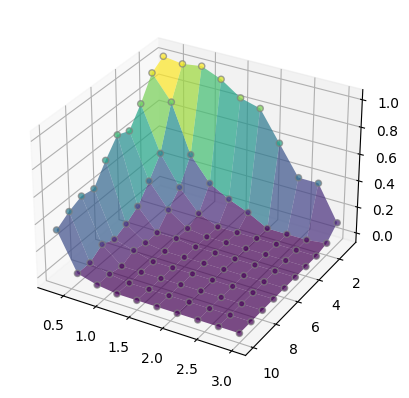

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 例として、何らかの2D配列データを生成します。
# 実際のデータは、あなたが提供する2D配列'data'になります。
#data = np.random.rand(10, 10)  # これはダミーデータです。
plot_data = 1-np.array(mydata)
#plot_data = np.array(mydata)

# データポイントのX, Y座標を生成します。
x = c_list
y = J_list_disp

X, Y = np.meshgrid(x, y)

# 新しい図を作成し、3D軸を追加します。
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, plot_data, cmap='viridis', alpha = 0.7)

ax.scatter(X.ravel(), Y.ravel(), plot_data.ravel(), c = plot_data.ravel(), cmap = "viridis", alpha = 0.7, edgecolor = "gray")
ax.invert_yaxis()

# カラーバーを追加します。
#fig.colorbar(surf, orientation="horizontal", shrink=0.5)
#plt.colorbar()

# 表示します。
#plt.show()
filename = f"./figures/3dplot_success_rate_{gate_type}_{error_type}_ndata_{n_data}.pdf"
plt.savefig(filename, bbox_inches = "tight")
print(f"...saved as {filename}")

...saved as ./figures/3dplot_success_rate_haar_depol_ndata_50_cbar.pdf


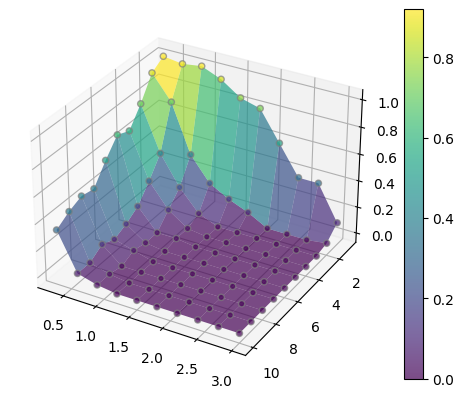

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plot_data = 1-np.array(mydata)
#plot_data = np.array(mydata)

# データポイントのX, Y座標を生成します。
x = c_list
y = J_list_disp

X, Y = np.meshgrid(x, y)

# 新しい図を作成し、3D軸を追加します。
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, plot_data, cmap='viridis', alpha = 0.7)

ax.scatter(X.ravel(), Y.ravel(), plot_data.ravel(), c = plot_data.ravel(), cmap = "viridis", alpha = 0.7, edgecolor = "gray")
ax.invert_yaxis()

# カラーバーを追加します。
#fig.colorbar(surf, orientation="horizontal", shrink=0.5)
fig.colorbar(surf, )
#plt.colorbar()

# 表示します。
#plt.show()
filename = f"./figures/3dplot_success_rate_{gate_type}_{error_type}_ndata_{n_data}_cbar.pdf"
plt.savefig(filename, bbox_inches = "tight")
print(f"...saved as {filename}")